In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [2]:
def get_ps_tsm_dataframes_csv(file_pattern: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Get the dataframes for the PS and TSM data from the files that match the pattern.
    """
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)

    df_ps, df_tsm = split_dataframe(df)
    
    return df_ps, df_tsm

def split_dataframe(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_ps = df[df['type'] == 'ps'].reset_index(drop=True)
    df_tsm = df[df['type'] == 'tsm'].reset_index(drop=True)
    
    return df_ps, df_tsm

def get_dataframe_csv(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

def get_dataframe_csv_no_header(file_pattern:str) -> pd.DataFrame:
    df = pd.DataFrame({}) 
    for file in glob.iglob(file_pattern):
        df_tmp = pd.read_csv(file, header=None)
        df = pd.concat([df, df_tmp], ignore_index=True)
        
    return df

### STOI

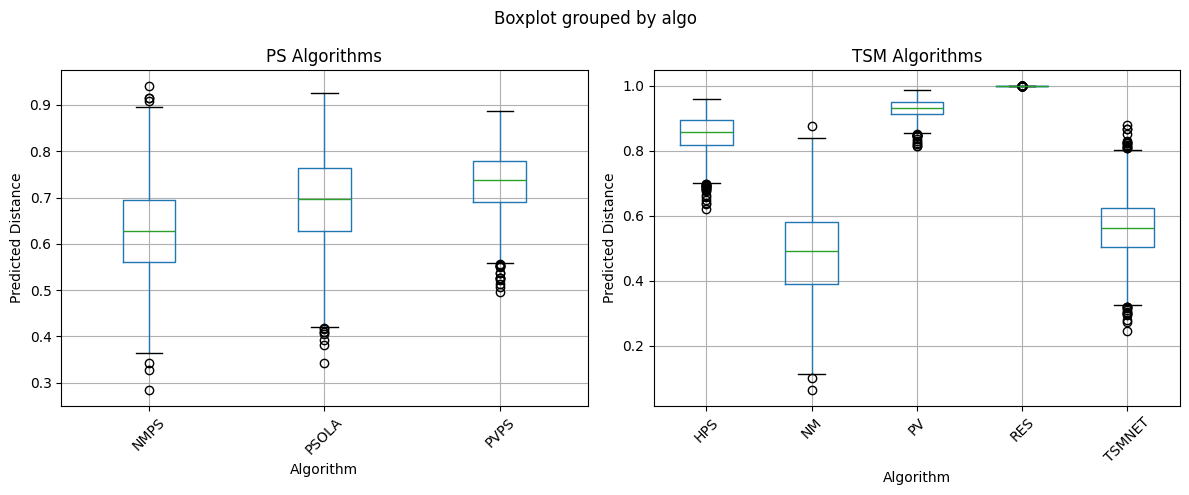

In [3]:
df_stoi_ps, df_stoi_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/stoi/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_stoi_ps.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Predicted Distance')

# Boxplot for df_tsm
df_stoi_tsm.boxplot(by='algo', column='pred_distance', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Predicted Distance')

plt.tight_layout()
plt.show()

### SISNR

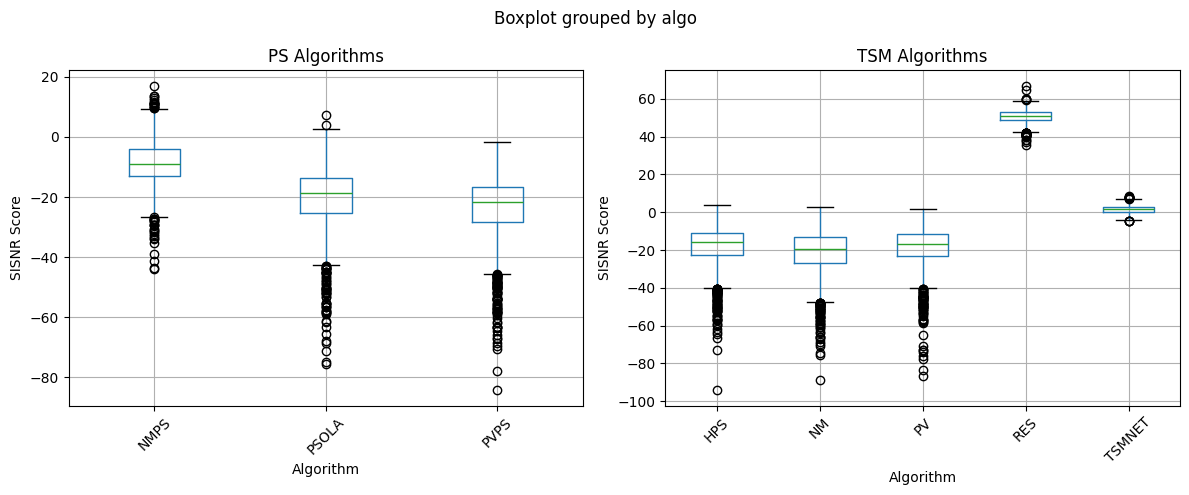

In [4]:
df_sisnr_ps, df_sisnr_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/sisnr/*.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_sisnr_ps.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('SISNR Score')

# Boxplot for df_tsm
df_sisnr_tsm.boxplot(by='algo', column='sisnr_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('SISNR Score')

plt.tight_layout()
plt.show()

### PESQ

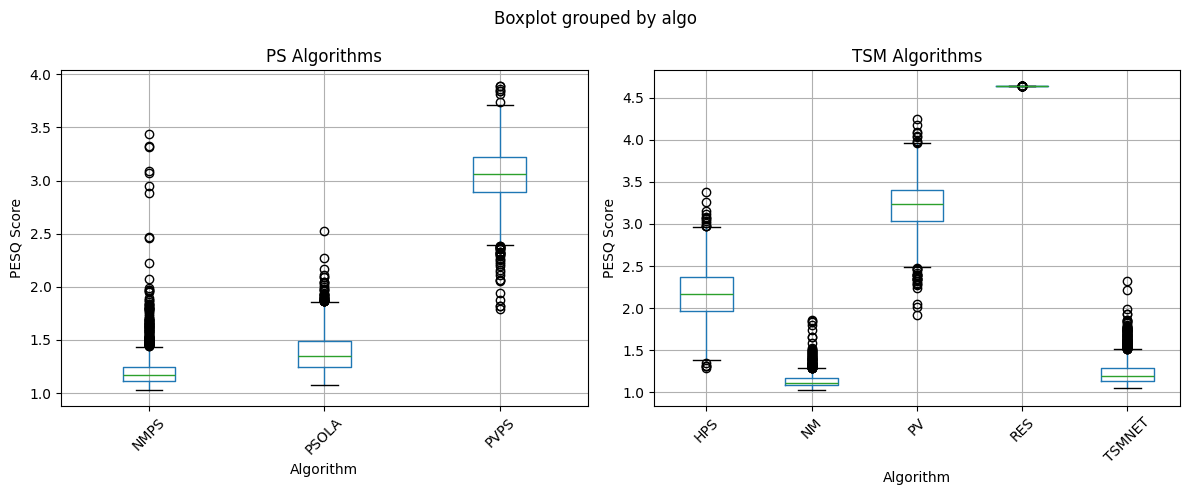

In [5]:
df_pesq_ps, df_pesq_tsm = get_ps_tsm_dataframes_csv("evaluation/objective/pesq/*.csv")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_pesq_ps.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('PESQ Score')

# Boxplot for df_tsm
df_pesq_tsm.boxplot(by='algo', column='pesq_score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('PESQ Score')

plt.tight_layout()
plt.show()

### NISQA

In [6]:
df_nisqa_tts = get_dataframe_csv("evaluation/objective/nisqa/tts/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_tts['type'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[3])
df_nisqa_tts['algo'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[4])
df_nisqa_tts['factor'] = df_nisqa_tts['path'].apply(lambda x: x.split('/')[5])

df_nisqa_tts_ps, df_nisqa_tts_tsm = split_dataframe(df_nisqa_tts)

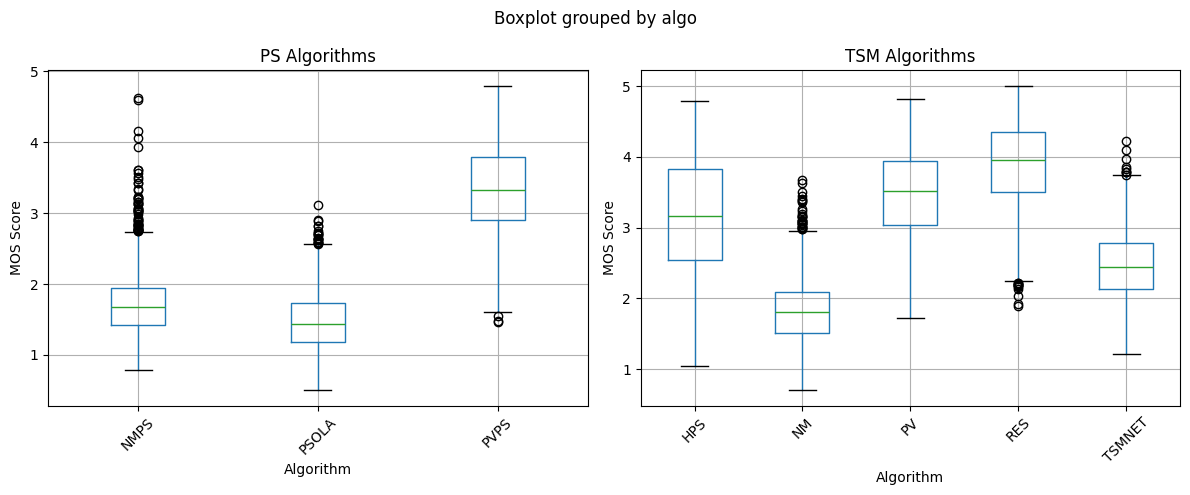

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_nisqa_tts_ps.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('MOS Score')

# Boxplot for df_tsm
df_nisqa_tts_tsm.boxplot(by='algo', column='mos_pred', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('MOS Score')

plt.tight_layout()
plt.show()

In [8]:
df_nisqa_std = get_dataframe_csv("evaluation/objective/nisqa/std/*.csv")

# "path" in the csv is of format "data/output/wav48/tsm/HPS/0.5/p225/p225_358.wav" where tsm, hps and 0.5 are type, algo and factor respectively
df_nisqa_std['type'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[3])
df_nisqa_std['algo'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[4])
df_nisqa_std['factor'] = df_nisqa_std['path'].apply(lambda x: x.split('/')[5])

df_nisqa_std_ps, df_nisqa_std_tsm = split_dataframe(df_nisqa_std)

/tmp/ipykernel_71949/3739302342.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
/tmp/ipykernel_71949/3739302342.py:11: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])


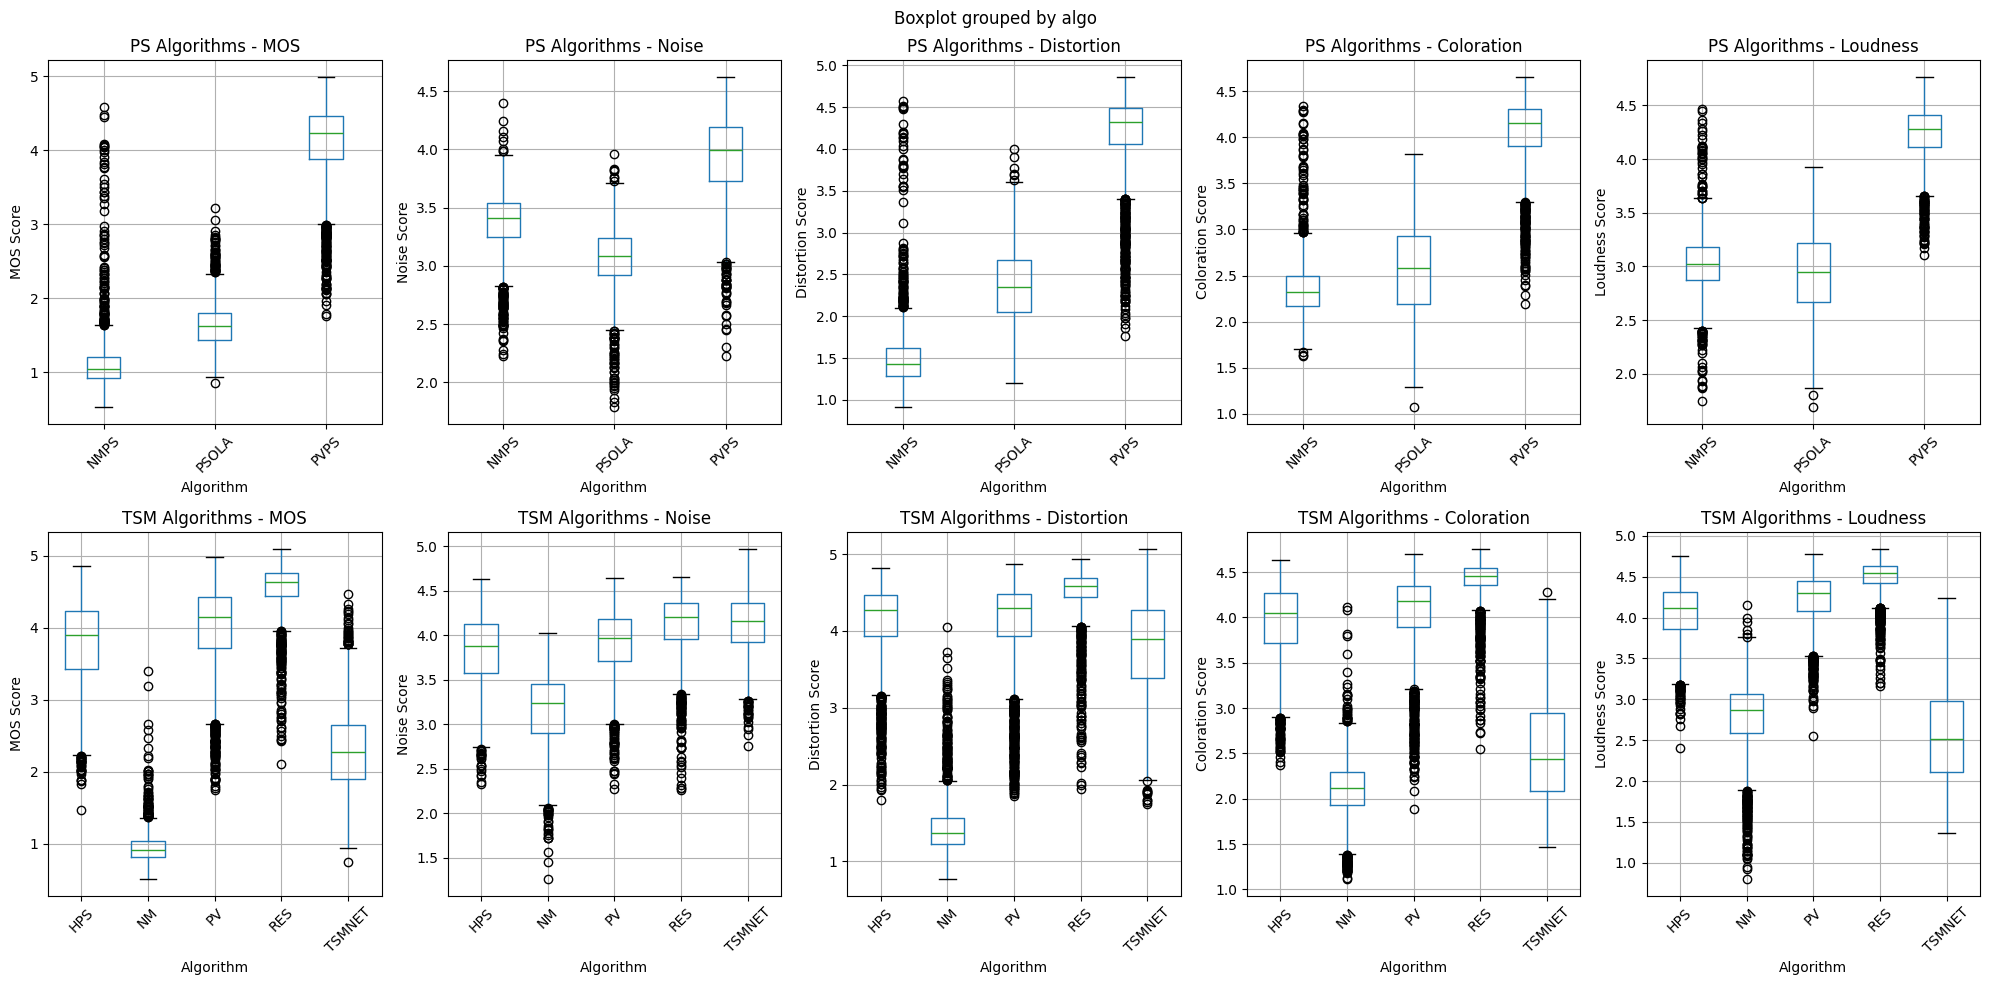

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Boxplots for df_ps
df_nisqa_std_ps.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

# Boxplots for df_tsm
df_nisqa_std_tsm.boxplot(by='algo', column=['mos_pred', 'noi_pred', 'dis_pred', 'col_pred', 'loud_pred'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['MOS', 'Noise', 'Distortion', 'Coloration', 'Loudness']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

plt.tight_layout()
plt.show()

### Audio Aesthetics

In [10]:
df_aa = pd.DataFrame({}) 
for file in glob.iglob("evaluation/objective/audio_aesthetics/*.jsonl"):
    df_tmp = pd.read_json(file, lines=True)
    df_aa = pd.concat([df_aa, df_tmp], ignore_index=True)
    
df_aa['type'] = df_aa['path'].apply(lambda x: x.split('/')[3])
df_aa['algo'] = df_aa['path'].apply(lambda x: x.split('/')[4])
df_aa['factor'] = df_aa['path'].apply(lambda x: x.split('/')[5])

df_aa_ps, df_aa_tsm = split_dataframe(df_aa)
df_aa_ps

,path,CE,CU,PC,PQ,type,algo,factor
0,data/output/wav48/ps/PVPS/rt_up/p225/p225_315.wav,4.869873,4.876750,1.565792,5.506493,ps,PVPS,rt_up
1,data/output/wav48/ps/PVPS/rt_up/p225/p225_293.wav,5.064950,5.552155,1.511881,6.375603,ps,PVPS,rt_up
2,data/output/wav48/ps/PVPS/rt_up/p225/p225_018.wav,5.039733,6.165765,1.623782,6.399394,ps,PVPS,rt_up
3,data/output/wav48/ps/PVPS/rt_up/p225/p225_071.wav,5.137623,6.007684,1.503009,6.498818,ps,PVPS,rt_up
4,data/output/wav48/ps/PVPS/rt_up/p225/p225_324.wav,4.895210,6.391539,1.540149,6.360943,ps,PVPS,rt_up
...,...,...,...,...,...,...,...,...
6349,data/output/wav48/ps/NMPS/rt_up/p230/p230_366.wav,2.491574,2.539728,2.512738,3.050113,ps,NMPS,rt_up
6350,data/output/wav48/ps/NMPS/rt_up/p230/p230_263.wav,2.083650,2.434432,2.243598,3.052959,ps,NMPS,rt_up
6351,data/output/wav48/ps/NMPS/rt_up/p230/p230_139.wav,2.382651,2.448509,2.323426,3.065181,ps,NMPS,rt_up
6352,data/output/wav48/ps/NMPS/rt_up/p230/p230_027.wav,2.193709,2.369688,2.332904,2.875817,ps,NMPS,rt_up


/tmp/ipykernel_71949/3181119340.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_ps.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[0])
/tmp/ipykernel_71949/3181119340.py:11: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_aa_tsm.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[1])


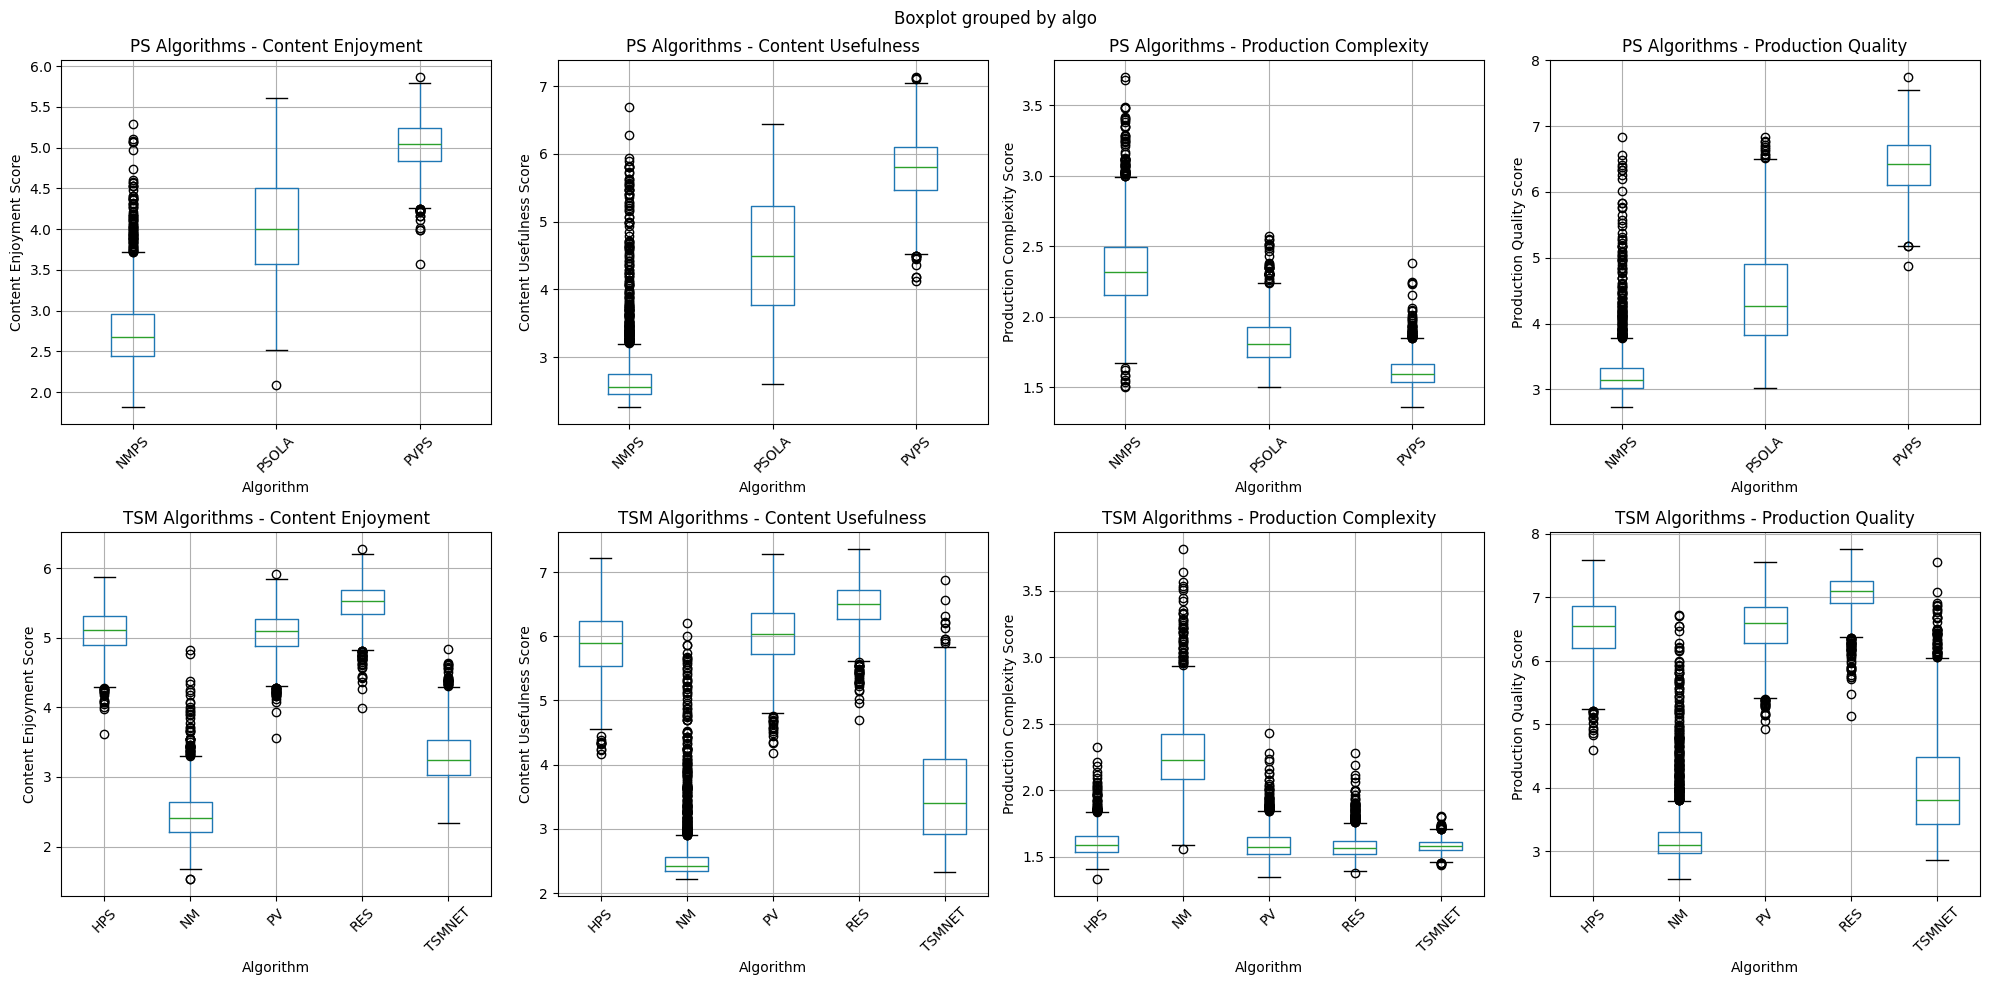

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Boxplots for df_ps
df_aa_ps.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[0])
for ax, metric in zip(axes[0], ['Content Enjoyment', 'Content Usefulness', 'Production Complexity', 'Production Quality']):
    ax.set_title(f'PS Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

# Boxplots for df_tsm
df_aa_tsm.boxplot(by='algo', column=['CE', 'CU', 'PC', 'PQ'], rot=45, ax=axes[1])
for ax, metric in zip(axes[1], ['Content Enjoyment', 'Content Usefulness', 'Production Complexity', 'Production Quality']):
    ax.set_title(f'TSM Algorithms - {metric}')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(f'{metric} Score')

plt.tight_layout()
plt.show()

### VISQOL

In [13]:
df_visqol = get_dataframe_csv_no_header("evaluation/objective/visqol/*.csv")
df_visqol.columns = ['input_path', 'output_path', 'score']

df_visqol['type'] = df_visqol['output_path'].apply(lambda x: x.split('/')[4])
df_visqol['algo'] = df_visqol['output_path'].apply(lambda x: x.split('/')[5])
df_visqol['factor'] = df_visqol['output_path'].apply(lambda x: x.split('/')[6])

df_visqol_ps, df_visqol_tsm = split_dataframe(df_visqol)
df_visqol_ps

,input_path,output_path,score,type,algo,factor
0,/data/input/wav16/p225/p225_315.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_31...,2.434171,ps,PSOLA,rt_up
1,/data/input/wav16/p225/p225_293.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_29...,2.513300,ps,PSOLA,rt_up
2,/data/input/wav16/p225/p225_018.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_01...,2.435474,ps,PSOLA,rt_up
3,/data/input/wav16/p225/p225_071.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_07...,2.435171,ps,PSOLA,rt_up
4,/data/input/wav16/p225/p225_324.wav,/data/output/wav16/ps/PSOLA/rt_up/p225/p225_32...,2.435679,ps,PSOLA,rt_up
...,...,...,...,...,...,...
4231,/data/input/wav16/p230/p230_366.wav,/data/output/wav16/ps/PVPS/rt_up/p230/p230_366...,3.008089,ps,PVPS,rt_up
4232,/data/input/wav16/p230/p230_263.wav,/data/output/wav16/ps/PVPS/rt_up/p230/p230_263...,2.898822,ps,PVPS,rt_up
4233,/data/input/wav16/p230/p230_139.wav,/data/output/wav16/ps/PVPS/rt_up/p230/p230_139...,2.826157,ps,PVPS,rt_up
4234,/data/input/wav16/p230/p230_027.wav,/data/output/wav16/ps/PVPS/rt_up/p230/p230_027...,2.981350,ps,PVPS,rt_up


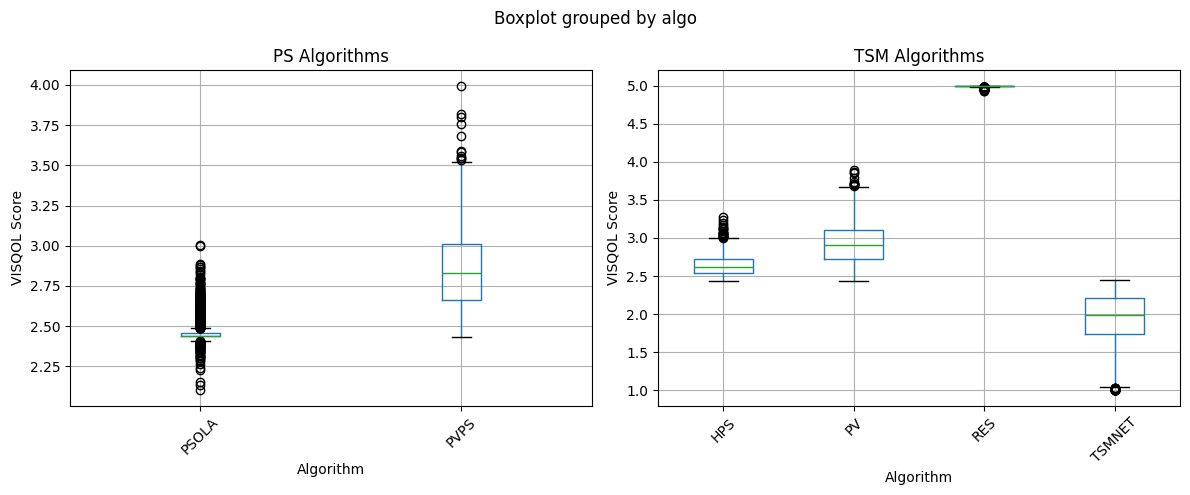

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for df_ps
df_visqol_ps.boxplot(by='algo', column='score', rot=45, ax=axes[0])
axes[0].set_title('PS Algorithms')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('VISQOL Score')

# Boxplot for df_tsm
df_visqol_tsm.boxplot(by='algo', column='score', rot=45, ax=axes[1])
axes[1].set_title('TSM Algorithms')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('VISQOL Score')

plt.tight_layout()
plt.show()